<a href="https://colab.research.google.com/github/prachi1294/599-Team-1/blob/main/Project_book_1_cloud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import spacy
import nltk
#nltk.download("gutenberg")
#from nltk.corpus import gutenberg
import requests
import re
from collections import defaultdict
from collections import Counter
import operator

from IPython.display import Javascript
def resize_colab_cell():
  display(Javascript('google.colab.output.setIframeHeight(0, true, {maxHeight: 5000})'))
get_ipython().events.register('pre_run_cell', resize_colab_cell)

In [2]:
nlp = spacy.load('en')
import pandas as pd
import matplotlib.pyplot as plt
import random

<IPython.core.display.Javascript object>

In [32]:
def read_books(url):
  r = requests.get(url)
  # What comes back includes headers and other HTTP stuff, get just the body of the response
  t = r.text
  return t


#save all the books
the_extra_ordinary_adv_lupin = 'https://www.gutenberg.org/files/6133/6133-0.txt'
arsene_lupin = 'https://www.gutenberg.org/cache/epub/4014/pg4014.txt'
lupin_vs_herlock_sholmes = 'https://www.gutenberg.org/files/40203/40203-0.txt'
the_hollow_needle = 'https://www.gutenberg.org/files/4017/4017-0.txt'
the_confession_of_lupin = 'https://www.gutenberg.org/cache/epub/28093/pg28093.txt'


#read all the books one by one

book1 = read_books(the_extra_ordinary_adv_lupin)
book2 = read_books(arsene_lupin)
book3 = read_books(lupin_vs_herlock_sholmes)
book4 = read_books(the_hollow_needle)
book5 = read_books(the_confession_of_lupin)



book_list=[book1,book2,book3,book4,book5]



<IPython.core.display.Javascript object>

In [38]:
# Answers for question 1-6
Q1_list=[None]*5
Q2_list=[None]*5
Q3_list=[None]*5
Q4_list=[None]*5
Q5_list=[None]*5
Q6_list=[None]*5

book_index = 1
text = book_list[book_index-1]

#print(text)


<IPython.core.display.Javascript object>

In [4]:
##my regex = (IX|IV|V?I{1,3}\.\s)([A-Z].*)(\W*[a-zA-Z])
## regex for selecting chapter name = (IX|IV|V|V?I{1,3})(\.\s[A-Z].*)
pattern = ("(IX|IV|V|V?I{1,3})(\.\s[A-Z].*)") #get the chapter name. Group 1 will get the chapter no followed by . and space. Group 2 will get chapter name
matches = []
matches = re.findall(pattern, book1)

<IPython.core.display.Javascript object>

In [5]:
words_pattern = ("(?!\[?[0-9]+[\[\]]?)[A-Za-z]?[a-z][a-z\']*") #extract words from book and ignores numeric and capital letters
words = []
words = re.findall(words_pattern, book1)
print(words[:10])

<IPython.core.display.Javascript object>

['The', 'Project', 'Gutenberg', 'e', 'Book', 'of', 'The', 'Extraordinary', 'Adventures', 'of']


In [6]:
sentence_pattern = (("[A-Z][^.]*[\.!?]"))
sentence = []
sentence = re.findall(sentence_pattern, book1)
print(sentence[:10])

<IPython.core.display.Javascript object>

['The Project Gutenberg eBook of The Extraordinary Adventures of ArsÃ¨ne Lupin, Gentleman-Burglar, by Maurice Leblanc\r\n\r\nThis eBook is for the use of anyone anywhere in the United States and\r\nmost other parts of the world at no cost and with almost no restrictions\r\nwhatsoever.', 'You may copy it, give it away or re-use it under the terms\r\nof the Project Gutenberg License included with this eBook or online at\r\nwww.', 'If you are not located in the United States, you\r\nwill have to check the laws of the country where you are located before\r\nusing this eBook.', 'Title: The Extraordinary Adventures of ArsÃ¨ne Lupin, Gentleman-Burglar\r\n\r\nAuthor: Maurice Leblanc\r\n\r\nRelease Date: November 17, 2002 [eBook #6133]\r\n[Last updated: February 6, 2021]\r\n\r\nLanguage: English\r\n\r\nCharacter set encoding: UTF-8\r\n\r\nProduced by: Nathan J.', 'Miller, and David Widger\r\n\r\n*** START OF THE PROJECT GUTENBERG EBOOK THE EXTRAORDINARY ADVENTURES OF ARSÃ\x88NE LUPIN ***\r\n\r\

In [39]:
# divide chapter function1
def chapter_divider1(text):
    Roman_numeric = ["I","II","III","IV","V","VI","VII","VIII","IX","X",
                 "XI","XII","XIII","XIV","XV","XVI","XVII","XVIII","XIX","XX",
                 "XXI","XXII","XXIII","XXIV","XXV","XXVI","XXVII","XXVIII","XXIX","XXX",
                 "XXXI","XXXII","XXXIII","XXXIV","XXXV","XXXVI","XXXVII","XXXVIII","XXXIX","XL",
                ]

    chapter_list1 = []
    for i in range(0,len(Roman_numeric)-1):
        Rn1=Roman_numeric[i]
        Rn2=Roman_numeric[i+1]
        #print(Rn1,Rn2)
        pattern="\s"+Rn1+"\."+".*[\.\w\s\r\n]*?"+Rn2+"\.\s"
        match = re.search(pattern, text) 

        if match:
    #         print(match.group())
    #         print(match.start())
#             print(match.end())
            last_end=match.end()
            pattern="(?<="+Rn1+"\.)"+".*(?=\r)"
            result=re.findall(pattern, match.group())
            #print(result[0])
            pattern="(?<=\s)\w.*"
            result=re.findall(pattern, result[0])
            pattern="(\s){3,}"
            match=re.search(pattern, result[0])
            if match:
                result[0]=result[0][0:match.start()]
#             print(result[0])
            chapter_list1.append(result[0])
        else:
            pattern="(?<="+Rn1+"\.)"+".*(?=\r)"
#             print(text[last_end-10:last_end+80])
            result=re.findall(pattern, text[last_end-10:last_end+100])
            if result:
#                 print(result[0])
                pattern="(?<=\s)\w.*"
                result=re.findall(pattern, result[0])
                pattern="(\s){3,}"
                match=re.search(pattern, result[0])
                if match:
                    result[0]=result[0][0:match.start()]
                chapter_list1.append(result[0])
            break
            #print("pattern not found")
    
    print("list1:",len(chapter_list1),chapter_list1)
    return(chapter_list1)



chapter_list1=chapter_divider1(book1)

# divide chapter function2
def chapter_divider2(text):
    chapter_list2 = []
    pattern="[IVX]\.[\s\r\n]+"+".*(?=\r)"
    result=re.findall(pattern, text)
    #print(result)
    #print(len(result))

    chapter_count=len(result)
    
    position_list=[]
    
    for r in result:
        #print(r)
        match=re.search(r, text)
        if match:
            position=match.end()
            position_list.append(position)
        else:
            position_list.append(0)
    
    for i in range(0,len(result)):
        if abs(position_list[i+1]-position_list[i])<100:
            r=result[i]
            pattern="(?<=\s)\w.*"
            new_r=re.findall(pattern, r)
            pattern="(\s){3,}"
            match=re.search(pattern, new_r[0])
            if match:
                new_r[0]=new_r[0][0:match.start()]
            if (new_r[0] in chapter_list2):
                break
            else:
                chapter_list2.append(new_r[0])
        else:
            r=result[i]
            pattern="(?<=\s)\w.*"
            new_r=re.findall(pattern, r)
            pattern="(\s){3,}"
            match=re.search(pattern, new_r[0])
            if match:
                new_r[0]=new_r[0][0:match.start()]
            if (new_r[0] in chapter_list2):
                break
            else:
                chapter_list2.append(new_r[0])
            break
    
    
    #print(position_list)
    
    print("list2:",len(chapter_list2),chapter_list2)
    
    return(chapter_list2)
    

chapter_list2=chapter_divider2(book2)
#print(len(chapter_list))

def chapter_divider(text):
    chapter_list1=chapter_divider1(text)
    chapter_list2=chapter_divider2(text)
    
    correct_flag_short=True
    
    for i in range(0,min(len(chapter_list1),len(chapter_list2))):
        if chapter_list1[i] != chapter_list2[i]:
            correct_flag_short=False
            
    if correct_flag_short:
        if len(chapter_list1)<len(chapter_list2):
            correct_flag_long = chapter_check(chapter_list1,chapter_list2)
        else:
            correct_flag_long = chapter_check(chapter_list2,chapter_list1)
    else:
        return("wrong list")
        
    if correct_flag_long:
        print("Correct:",len(chapter_list2),chapter_list2)
        return(chapter_list2)
    else:
        print("Correct:",len(chapter_list1),chapter_list1)
        return chapter_list1

def chapter_check(chapter_short,chapter_long):
    correct_flag = True
    for i in range(len(chapter_short),len(chapter_long)):
        chaptername_check = chapter_long[i]
        print(chaptername_check)
        for chaptername in chapter_short:
            
            Uppercheck1 = (chaptername_check.upper() in chaptername.upper())
            Uppercheck2 = (chaptername.upper() in chaptername_check.upper())
            Uppercheck  = Uppercheck1 | Uppercheck2
            Lowercheck1 = (chaptername_check.lower() in chaptername.lower())
            Lowercheck2 = (chaptername.lower() in chaptername_check.lower())
            Lowercheck  = Lowercheck1 | Lowercheck2
#             print(chaptername_check.upper(),chaptername.upper(),Uppercheck)
#             print(chaptername_check.lower(),chaptername.lower(),Lowercheck)
            if Uppercheck | Lowercheck :
                correct_flag = False
                break
    
    return correct_flag 
        
chapter_divider(book1)






<IPython.core.display.Javascript object>

list1: 9 ['The Arrest of ArsÃ¨ne Lupin', 'ArsÃ¨ne Lupin in Prison', 'The Escape of ArsÃ¨ne Lupin', 'The Mysterious Traveller', 'The Queenâ\x80\x99s Necklace', 'The Seven of Hearts', 'Madame Imbertâ\x80\x99s Safe', 'The Black Pearl', 'Sherlock Holmes Arrives Too Late']
list2: 23 ["THE MILLIONAIRE'S DAUGHTER", 'THE COMING OF THE CHAROLAIS', "LUPIN'S WAY", 'THE DUKE INTERVENES', 'A LETTER FROM LUPIN', 'AGAIN THE CHAROLAIS', 'THE THEFT OF THE MOTOR-CARS', 'THE DUKE ARRIVES', 'M. FORMERY OPENS THE INQUIRY', 'GUERCHARD ASSISTS', 'THE FAMILY ARRIVES', 'THE THEFT OF THE PENDANT', 'LUPIN WIRES', 'GUERCHARD PICKS UP THE TRUE SCENT', 'THE EXAMINATION OF SONIA', "VICTOIRE'S SLIP", "SONIA'S ESCAPE", 'THE DUKE STAYS', 'THE DUKE GOES', 'LUPIN COMES HOME', 'THE CUTTING OF THE TELEPHONE WIRES', 'THE BARGAIN', 'THE END OF THE DUEL']
list1: 9 ['The Arrest of ArsÃ¨ne Lupin', 'ArsÃ¨ne Lupin in Prison', 'The Escape of ArsÃ¨ne Lupin', 'The Mysterious Traveller', 'The Queenâ\x80\x99s Necklace', 'The Seven of 

['The Arrest of ArsÃ¨ne Lupin',
 'ArsÃ¨ne Lupin in Prison',
 'The Escape of ArsÃ¨ne Lupin',
 'The Mysterious Traveller',
 'The Queenâ\x80\x99s Necklace',
 'The Seven of Hearts',
 'Madame Imbertâ\x80\x99s Safe',
 'The Black Pearl',
 'Sherlock Holmes Arrives Too Late']

In [40]:
#identify text in each chapter
def chapter_text_find(text):
    chapter_list=chapter_divider(text)
    
    chapter_text=[]
    chapter_count=len(chapter_list)
    chapter_name = chapter_list[chapter_count-1]
    match = re.search(chapter_name, text) 
    n_text=text[match.end():len(text)]

    span_list=[]
    for i in range(0,chapter_count):
        chapter_name=chapter_list[i]
        pattern="[^a-zA-Z\s]"
        chapter_name_clear=re.sub(pattern, ".",chapter_name)
        match = re.search(chapter_name_clear, n_text) 
        if match:
            print(chapter_name_clear)
            print(match.group())
            print(match.span())
        else:
            match = re.search(chapter_name_clear.upper(), n_text)
            print(chapter_name_clear.upper())
            if match:
                print(match.group())
                print(match.span())
        span_list.append(match.span())
    span_list.append([len(n_text),len(n_text)])
    print(span_list)
    for i in range(0,chapter_count):
        textinchapter=n_text[span_list[i][1]:span_list[i+1][0]]
        chapter_text.append(textinchapter)
    print("Chapter text number:",len(chapter_text))
    return chapter_text
    
chapter_text=chapter_text_find(book1)


<IPython.core.display.Javascript object>

list1: 9 ['The Arrest of ArsÃ¨ne Lupin', 'ArsÃ¨ne Lupin in Prison', 'The Escape of ArsÃ¨ne Lupin', 'The Mysterious Traveller', 'The Queenâ\x80\x99s Necklace', 'The Seven of Hearts', 'Madame Imbertâ\x80\x99s Safe', 'The Black Pearl', 'Sherlock Holmes Arrives Too Late']
list2: 9 ['The Arrest of ArsÃ¨ne Lupin', 'ArsÃ¨ne Lupin in Prison', 'The Escape of ArsÃ¨ne Lupin', 'The Mysterious Traveller', 'The Queenâ\x80\x99s Necklace', 'The Seven of Hearts', 'Madame Imbertâ\x80\x99s Safe', 'The Black Pearl', 'Sherlock Holmes Arrives Too Late']
Correct: 9 ['The Arrest of ArsÃ¨ne Lupin', 'ArsÃ¨ne Lupin in Prison', 'The Escape of ArsÃ¨ne Lupin', 'The Mysterious Traveller', 'The Queenâ\x80\x99s Necklace', 'The Seven of Hearts', 'Madame Imbertâ\x80\x99s Safe', 'The Black Pearl', 'Sherlock Holmes Arrives Too Late']
The Arrest of Ars..ne Lupin
The Arrest of ArsÃ¨ne Lupin
(15, 42)
Ars..ne Lupin in Prison
ArsÃ¨ne Lupin in Prison
(25694, 25717)
The Escape of Ars..ne Lupin
The Escape of ArsÃ¨ne Lupin
(62459,

In [41]:
# sentence divider function
def sentence_divider(text):
    ellipsis = "(\.\.\.+)"
    temp_text = re.sub(ellipsis,"^",text)
    Mr = "M\."
    Mr_temp = "M&"
    Mme = "Mme\."
    Mme_temp = "M%"
    temp_text = re.sub(Mr,Mr_temp,temp_text)
    temp_text = re.sub(Mme,Mme_temp,temp_text)
    special_quote1 = book3[1761:1764]
    temp_text=re.sub(special_quote1,'"',temp_text)
    special_quote2 = book3[1761+29:1764+29]
    temp_text=re.sub(special_quote2,"'",temp_text)
    special_quote3 = book3[1761+51:1764+51]
    temp_text=re.sub(special_quote3,'"',temp_text)
    
    pattern = ""
    mid_puncatuation="[\w,:;'\"\\s\-_\[\]\(\)\&\^\%]+"
    # "....."
    pattern = pattern+"(\\s+\"+"+mid_puncatuation+"[:.?!]+(\^)?\"(?=\\s))"
    # .....
    pattern = pattern+"|(\\s+"+mid_puncatuation+"[.?!]+(\^)?(?=\\s))"
    # ".....
    pattern = pattern+"|(\\s+\"+"+mid_puncatuation+"[:.?!]+(\^)?(?=\\s))"
    # ....."
    pattern = pattern+"|(\\s+"+mid_puncatuation+"[:.?!]+(\^)?\"(?=\\s))"
    sentence_find = re.findall(pattern, temp_text) 
    line_number=0
    sentence_result = []
    for sent in sentence_find:
        line_number=line_number+1
        #print(line_number)
        len_sent = 0
        for s in sent:
            if(len(s)>len_sent):
                len_sent=len(s)
                sent_sub=s
            
        sent_sub=re.sub(r'[\r\n]+',' ',sent_sub)
        sent_sub=re.sub("\^","...",sent_sub)
        sent_sub=re.sub("M\&","M.",sent_sub)
        sent_sub=re.sub("M\%","Mme.",sent_sub)
        #print(sent_sub)
        sentence_result.append(sent_sub)
    return sentence_result

chapter = chapter_text[0]
sentence_result=sentence_divider(chapter)
print(sentence_result)

<IPython.core.display.Javascript object>

[' It was a strange ending to a voyage that had commenced in a most auspicious manner.', " Provence' was a swift and comfortable vessel, under the command of a most affable man.", ' The passengers constituted a select and delightful society.', ' The charm of new acquaintances and improvised amusements served to make the time pass agreeably.', ' We enjoyed the pleasant sensation of being separated from the world, living, as it were, upon an unknown island, and consequently obliged to be sociable with each other.', ' Have you ever stopped to consider how much originality and spontaneity emanate from these various individuals who, on the preceding evening, did not even know each other, and who are now, for several days, condemned to lead a life of extreme intimacy, jointly defying the anger of the ocean, the terrible onslaught of the waves, the violence of the tempest and the agonizing monotony of the calm and sleepy water?', ' Such a life becomes a sort of tragic existence, with its stor

In [42]:
# search Name

#test_sentence=sentence_nltk[]
class entities:
    def __init__(self, name, count,position,label):
        self.name = name
        self.count = count
        self.position = [position]
        self.label = label
    def addonce(self,position):
        self.count = self.count + 1
        self.position.append(position)



pattern="(?<!^)[A-Z][a-z]+"
# pattern = "[A-Z]"+"([a-z]+|\.)"
# pattern = "[A-Z]([a-z]+|\.)(?:\s+[A-Z]([a-z]+|\.))*(?:\s+[a-z][a-z\-]+){0,2}\s+[A-Z]([a-z]+|\.)"
chapter_number=0
entities_list=[]
entities_count=[]
entities_objects=[]
sentence_total = []
for chapter in chapter_text:
    linenumber = 0
    chapter_number = chapter_number+1
    print(chapter_number)
    sentence = sentence_divider(chapter)
    sentence_total.append(sentence)
    for sent in sentence:
        linenumber = linenumber +1
        match=re.findall(pattern, sent)
        if match:
            #print(sent)
            #print(match)
            for temp_ent in match:
                if (temp_ent in entities_list):
                    ent_index=entities_list.index(temp_ent)
                    entities_count[ent_index]=entities_count[ent_index]+1
                    position = [chapter_number,linenumber]
                    entities_objects[ent_index].addonce(position)
                else:
                    entities_list.append(temp_ent)
                    entities_count.append(1)
                    position = [chapter_number,linenumber]
                    entities_objects.append(entities(temp_ent,1,position,""))

# print(entities_list)                                        
# print(entities_count)                                        
entities_objects_sorted=sorted(entities_objects, key=lambda entities: entities.count, reverse=True)


<IPython.core.display.Javascript object>

1
2
3
4
5
6
7
8
9


In [43]:
#top 25 characters
topnum = 200
top_entities_objects=[]
top_count=0
for i in range(0,len(entities_objects_sorted)):
    if(entities_objects_sorted[i].label != "CARDINAL")&(entities_objects_sorted[i].label != "ORDINAL"):
        top_entities_objects.append(entities_objects_sorted[i])
        top_count = top_count+1
    if top_count == topnum:
        break
    

#top_entities_objects = entities_objects_sorted[0:25]
print("Name, Count, First appear Chapter-Sentence, Label")
for i in range(0,topnum):
    print(top_entities_objects[i].name,top_entities_objects[i].count,
          top_entities_objects[i].position[0],top_entities_objects[i].label)

<IPython.core.display.Javascript object>

Name, Count, First appear Chapter-Sentence, Label
The 332 [1, 3] 
He 300 [1, 44] 
Lupin 290 [1, 17] 
But 171 [1, 8] 
It 156 [1, 1] 
And 125 [1, 30] 
What 103 [1, 56] 
Mon 97 [1, 76] 
You 97 [1, 226] 
Yes 88 [1, 69] 
Ganimard 87 [1, 26] 
Then 86 [1, 64] 
No 74 [1, 13] 
That 68 [1, 11] 
She 68 [1, 36] 
In 65 [1, 53] 
Project 60 [9, 623] 
Gutenberg 60 [9, 623] 
At 59 [1, 17] 
They 57 [1, 260] 
Ah 53 [1, 217] 
Daspry 53 [6, 15] 
Varin 53 [6, 220] 
Andermatt 52 [6, 199] 
Devanne 51 [9, 6] 
There 50 [1, 269] 
We 46 [1, 5] 
If 45 [1, 21] 
Oh 41 [1, 49] 
Well 41 [1, 63] 
How 36 [1, 200] 
Why 35 [1, 92] 
Nelly 33 [1, 31] 
My 32 [1, 104] 
To 32 [1, 130] 
Louis 32 [2, 46] 
Madame 32 [4, 198] 
Monsieur 31 [1, 57] 
His 30 [1, 96] 
Holmes 30 [2, 342] 
Miss 29 [1, 31] 
Now 29 [2, 125] 
Imbert 27 [7, 22] 
Velmont 27 [9, 5] 
Lacombe 26 [6, 265] 
One 24 [1, 251] 
For 24 [1, 285] 
After 24 [2, 154] 
Of 23 [1, 97] 
On 23 [1, 165] 
Baron 23 [2, 8] 
When 23 [2, 90] 
Not 22 [1, 52] 
Rozaine 22 [1, 84] 
Who 2

In [45]:
# define character
protagonist="Lupin"
if book_index==1:
  character_list=['Lupin','Ganimard', 'Daspry', 'Varin','Devanne',"Andermatt",
                    'Velmont','Rozaine','Henriette','Floriani','Sherlock Holmes',
                    'Louis Lacombe','Baudru','Holmes'
                  ]

if book_index==2:
    character_list=['Lupin','Duke', 'Guerchard', 'Germaine','Sonia',"Bonavent",
                    'Gournay-Martin','Firmin','Dieusy','Jean','Mademoiselle',
                    'Kritchnoff','Irma','Jacques','Jeanne','Bernard','Marie',
                    'Charolais','Gournay-Martin',
                   ]

if book_index==3:
    character_list=["Lupin","Ganimard","Wilson","Gerbois","Herlock","Sholmes",
                    "Englishman","Jewish","Monsieur","Clotilde","Bresson",
                    "Charles","Mademoiselle","Suzanne","Baron","Antoinette",
                    "Bleichen","Madame","Destange"
                   ]

#book4 characters
if book_index==4:
    character_list=["Beautrelet","Lupin","Ganimard","Isidore","ValmÃ©ras",
                    "Filleul","Mlle","LycÃ©e","Norman","BrÃ©doux","Marie",
                    "Dieppe","Raymonde","Jean","Louis","Saint-VÃ©ran","Don",
                    "Larbeyrie",
                    "Suzanne","Maurice","FrÃ©fossÃ©","Albert","Gaffer",
                    "Holmlock"
                   ]

#book5 characters
if book_index==5:
    character_list=["Lupin","Ganimard","Gutenberg","Dugrival","Mme",
                   "Yvonne","Gabriel","Jeanne","Darcieux","Dudouis",
                    "Goussot","Sparmiento","Angélique","Mlle","Jove",
                    "Maître","Valandier","Louise","Ernemont","Jeanniot",
                    "Lavernoux","Charles","Trainard","Jenny","Saphir",
                    "Emboise","Velmont","Boulevard"
                   ]

character_object_list=[]

for character in character_list:
    mark = True
    for ent in entities_objects_sorted:
        if character == ent.name:
            character_object_list.append(ent)
            #print(character+" found")
            mark = False
            break
    if mark:
        print(character+" not found")


<IPython.core.display.Javascript object>

Sherlock Holmes not found
Louis Lacombe not found


In [46]:
for character in character_object_list:
    if (protagonist in character.name):
        if 'protagonist_ent' in locals():
            protagonist_ent.position = protagonist_ent.position + character.position
        else:
            protagonist_ent = entities(protagonist,character.count,character.position,"")
    else:
        print(character.name)
        #print(character.position)
        for position in character.position:
            sent = sentence_total[position[0]-1][position[1]-1]
            #print(position)
            #print(sent)

<IPython.core.display.Javascript object>

Ganimard
Daspry
Varin
Devanne
Andermatt
Velmont
Rozaine
Henriette
Floriani
Baudru
Holmes


In [54]:
# define character
detective_ent=[]
perpetrator_ent=[]
suspect_ent = []

if book_index==1:
    detective=["Ganimard","Folenfant","Dieuzy"]
    perpetrator=["Lupin"]
    suspect = ["Varin","Henriette"]
    crime_list=[[1,127],[3, 391]]
    crime_sent=["Then it was proven that, at the time of the theft, Rozaine was promenading on the deck" ,
                "Lupin made only a slight movement, and, as suddenly as he had made the attack, Ganimard released his hold",
               ]
    crime_type=["Theft","attack"]

if book_index==2:
    detective=["Guerchard","Dieusy","Bonavent"]
    perpetrator=["Lupin","Duke"]
    suspect = ["Mademoiselle","Duke"]
    crime_list=[[8,181],[8, 110],[9, 35]]
    crime_sent=["Lupin said, between his teeth: \"Failing my instructions to the contrary, two of my friends have orders to enter your father's room to-night, at three o'clock in the morning, to seize him and carry him off to join Ganimard and Holmlock Shears.\"",
                "In the course of his fight with Lupin, Beautrelet had met with many surprises and he was still prepared, at the moment of the final catastrophe, to experience any number of further emotions; but the shock which he received this time was utterly unexpected.",
               "How could any one suspect ValmÃ©ras of being Lupin, when ValmÃ©ras was Beautrelet's friend and after ValmÃ©ras had snatched from Lupin's clutches the girl whom Lupin loved?",
               ]
    crime_type=["Burglary","Plundered","Theft"]


if book_index==3:
    detective = ["Ganimard","Herlock","Sholmes"]
    perpetrator=["Lupin"]
    suspect  = ['Antoinette', 'Herr','Bleichen',
                'Madame','de Réal', 'Réal', 'Destange', 'Clotilde']
    
    suspects = ['drayman, wearing a badge', 'a blonde woman—extremely blonde',
                'A young man named Ernest', 'Antoinette', 'Herr Bleichen',
                'Madame de Réal', 'Madame Réal', 'Destange', 'Clotilde']
    crimes = [r'desk is gone', r'abduction of', r'lay the', r'rings was']
    crime_type = ["Burglary","Abduction","Murder","Framed"]
    crime_list=[[1,57],[1,296],[2,40],[2,337]]
    

if book_index==4:
    detective=["Ganimard","Filleul","Beautrelet"]
    perpetrator=["Lupin","ValmÃ©ras"]
    suspect = ["BrÃ©doux"]
    crime_list=[[4,312],[10, 7],[10, 52]]
    crime_sent=["Lupin said, between his teeth: \"Failing my instructions to the contrary, two of my friends have orders to enter your father's room to-night, at three o'clock in the morning, to seize him and carry him off to join Ganimard and Holmlock Shears.\"",
                "In the course of his fight with Lupin, Beautrelet had met with many surprises and he was still prepared, at the moment of the final catastrophe, to experience any number of further emotions; but the shock which he received this time was utterly unexpected.",
               "How could any one suspect ValmÃ©ras of being Lupin, when ValmÃ©ras was Beautrelet's friend and after ValmÃ©ras had snatched from Lupin's clutches the girl whom Lupin loved?",
               ]
    crime_type=["Seize","Fight","Disguise & deceive"]
    
if book_index==5:
    detective=["Ganimard","Dudouis"]
    perpetrator=["Lupin"]
    suspect = ["Sparmiento"]
    crime_list=[[4, 112]]
    crime_sent=["By the light of a lantern carried by one of the neighbours, he found Gabriel stretched at full-length in his bedroom, with his wrists and ankles bound and a gag forced into his mouth, while, in the next room, Mme. Dugrival lay with her life's blood ebbing away through a great gash in her breast.",
               ]
    crime_type=["Attack"]



for character in character_object_list:
    for d in detective:
        if (d==character.name):
            print(d)
            detective_ent.append(character)
    for p in perpetrator:
        if (p==character.name):
            print(p)
            perpetrator_ent.append(character)            
    for s in suspect:
        if (s==character.name):
            print(s)
            suspect_ent.append(character)

if book_index==3:
    print(detective)
    d1=entities(detective_ent[1].name,detective_ent[1].count,detective_ent[1].position,detective_ent[1].label)
    d1.merge(detective_ent[2])
    detective_ent=[detective_ent[0],d1]
    print(detective_ent[1])
    #detective_ent[1].merge(detective_ent[2])
    print(detective_ent[1].position)

<IPython.core.display.Javascript object>

Lupin
Ganimard
Varin
Henriette


In [49]:
print(Q1_list)

#print(Q2_list)
#print(Q3_list)
# print(Q4_list)
# print(Q5_list)
#print(Q6_list)

<IPython.core.display.Javascript object>

[None, None, None, None, None]


In [50]:
# Q1:When does the investigator occur for the first time -  chapter #, the sentence(s) # in a chapter,
#speical adjustment

Q1_answer=[]


for d in detective_ent:
    print(d.name)
    print(d.position[0])
    Q1_answer.append([d.name,d.position[0]])
print(Q1_answer)
Q1_list[book_index-1]=Q1_answer

<IPython.core.display.Javascript object>

Ganimard
[1, 26]
[['Ganimard', [1, 26]]]


In [52]:
word_dict={}

pattern = "(?<!^)[\w©-]+(?=\W)"
for p in perpetrator_ent:
    for position in p.position:
        sent=sentence_total[position[0]-1][position[1]-1]
        #print(position)
        #print(sent)
        result = re.findall(pattern, sent)
        #print(result)
        if (p.name in result):
            index = result.index(p.name)
        else:
            for r in result:
                match = re.search(p.name,r)
                if match:
                    print(r)
                    index = result.index(r)
            
        preceding_index = min(3,index)
        preceding3 = result[index-preceding_index-1:index-1]
        following_index = min(3,len(result)-1-index)
        following3 = result[index+1:index+following_index+1]
        print(p.name,index,preceding3,following3)
        for word in preceding3:
            if (word in word_dict):
                word_dict[word]=word_dict[word]+1
            else:
                word_dict[word]=1
        for word in following3:
            if (word in word_dict):
                word_dict[word]=word_dict[word]+1
            else:
                word_dict[word]=1

<IPython.core.display.Javascript object>

Lupin 0 [] ['is', 'on', 'your']
Lupin 0 [] ['was', 'concealing', 'himself']
Lupin 0 [] ['was', 'hiding', 'in']
Lupin 0 [] ['in', 'our', 'midst']
Lupin 0 [] ['gentleman-burglar', 'will', 'return']
Lupin 0 [] ['the', 'man', 'of']
Lupin 0 [] ['was', 'wandering', 'about']
Lupin 0 [] ['was', 'perhaps', 'this']
Lupin 0 [] []
Lupin 4 ['In', 'the', 'first'] ['calls', 'himself', 'Monsieur']
Lupin 0 [] []
Lupin 0 [] ['will', 'furnish', 'you']
Lupin 0 [] ['could', 'commit', 'a']
Lupin 0 [] ['or', 'other', 'person']
Lupin 0 [] ['the', 'contest', 'promised']
Lupin 0 [] []
Lupin 0 [] ['burglar', 'though', 'he']
Lupin 0 [] ['accepts', 'with', 'pleasure']
Lupin 0 [] ['as', 'it', 'was']
Lupin 0 [] ['but', 'was', 'Rozaine']
Lupin 0 [] ['was', 'once', 'more']
Lupin 0 [] ['was', 'now', 'anybody']
Lupin 0 [] ['would', 'confine', 'himself']
Lupin 0 [] []
Lupin 0 [] []
Lupin 0 [] ['concealing', 'himself']
Lupin 0 [] ['escaped', 'from', 'the']
Lupin 0 [] []
Lupin 0 [] []
Lupin 0 [] ['is', 'concerned', 'in']
L

<IPython.core.display.Javascript object>

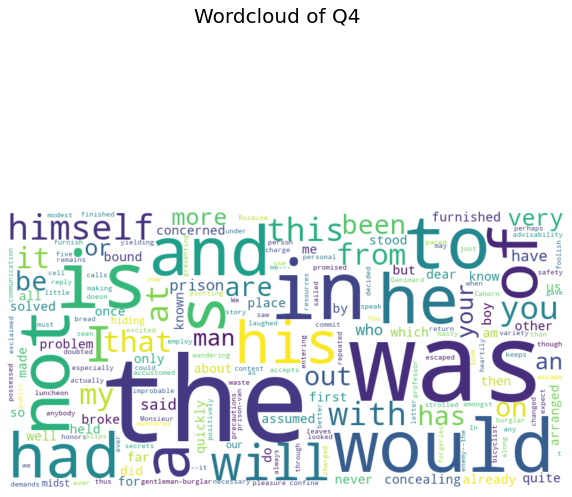

In [53]:
from wordcloud import WordCloud
def word_cloud(char, title):
    f = plt.figure (figsize=(10, 10))
    f.suptitle(title, fontsize=20)
    word_cloud = WordCloud(collocations = False,background_color = 'white', width=800, height=400, max_words=200).generate_from_frequencies(char)
    plt.imshow(word_cloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

plot1 = word_cloud(word_dict, 'Wordcloud of Q4')
Q4_list[book_index-1]=word_dict